In [16]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import re
import datetime
import operator
import time


from RGBAnalysisFunctions import *
from DataCollectorFunctions import *

home = os.getcwd()

#os.chdir('C:\\Users\\Doug\\Desktop\\CSSS_projects\\comp-syn')

In [30]:
searchterms='puddle'
searchterms_list = searchterms.split(",")

In [33]:
term='puddle'
term_img_set = os.listdir('downloads/' + term)

In [34]:
img_dict = get_imgs(searchterms_list)

In [36]:
def get_image_structure(searchterms_list, home, img_dict):
    os.chdir(home)
    img_dict_clean, img_array_dict, img_array_complexity_dict = get_img_dict(searchterms_list, 
                                                                             home, 
                                                                             img_dict)
    
    distribution_dict, h_dict, s_dict, v_dict, rgb_dict = get_color_distributions(img_array_dict, 
                                                                                  hsv=True, rgb=True, 
                                                                                  spacing=10)
    entropy_dict = cross_entropy_between_images(rgb_dict)
    compressed_img_array_dict = compress_img_array(searchterms_list, img_array_dict)
    #cross_entropy_between_labels_dict, cross_entropy_matrix = cross_entropy_between_labels(rgb_dict, searchterms_list)
    
    return distribution_dict, h_dict, s_dict, v_dict, rgb_dict, entropy_dict, compressed_img_array_dict

In [40]:
distribution_dict, h_dict, s_dict, v_dict, rgb_dict, entropy_dict, compressed_img_array_dict = get_image_structure(searchterms_list, home, img_dict)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2685: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


In [41]:
index = 0
word = searchterms_list[index]

In [42]:
spacing = 10
bins = np.arange(0,360+spacing,spacing)
centers = (bins[:-1] + bins[1:]) / 2

meanhsvcolor = colorsys.hsv_to_rgb(np.mean(h_dict[word],axis=0),
                                   np.mean(s_dict[word],axis=0),
                                   np.mean(v_dict[word],axis=0))

meanrgbcolor = np.mean(np.array(rgb_dict[searchterms_list[0]]),axis=0)
    
rgbcolors = []
for i in range(len(centers)):
    rgbcolors.append(colorsys.hsv_to_rgb(centers[i]/360.,
                                         np.mean(s_dict[word],axis=0),
                                         np.mean(v_dict[word],axis=0)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


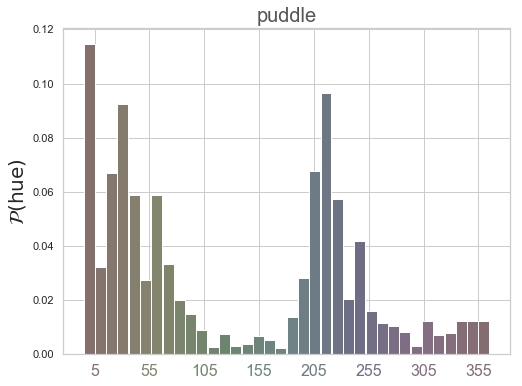

In [43]:
f,ax = plt.subplots(1,1,figsize=(8,6))

alpha = 0.17
N = 360

avg_rgb = np.mean(np.array(distribution_dict[word]),axis=0)

ind = np.linspace(0,N,N/spacing) #the x locations for the groups
width = spacing #the width of the bars

p1 = ax.bar(ind, spacing*avg_rgb, width, color=rgbcolors)

#ax.set_ylim(0,1.1)
ax.set_title('{}'.format(word), fontsize=20, color=meanrgbcolor)
ax.set_xticks(centers[::5])
ax.set_xticklabels(centers[::5].astype(int), fontsize=16)
#ax.set_yticks((0,0.2,0.4,0.6,0.8,1.0))
#ax.set_yticklabels(('0', '0.2', '0.4', '0.6', '0.8', '1'), fontsize=20)

[t.set_color(i) for (i,t) in
 zip(rgbcolors[::5],ax.xaxis.get_ticklabels())]

plt.ylabel(r'$\mathcal{P}(\rm{hue})$',fontsize=20)
plt.subplots_adjust(wspace=0.25)

#plt.savefig('atlantis.pdf')
plt.show()